In [1]:
from catalogue import *

Using TensorFlow backend.


RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

In [95]:
def change_to_colour(inputf):
    # Make data to train on colours
    inputs_col = pd.DataFrame()
    inputs_col['u-G']=inputf['u']-inputf['G']
    inputs_col['g-r']=inputf['g']-inputf['r']
    inputs_col['i-z']=inputf['i']-inputf['z']
    inputs_col['BP-RP']=inputf['BP']-inputf['RP']
    inputs_col['z-y']=inputf['z']-inputf['y']
    return inputs_col

def criteria_function(inputs_NGC, std_x, col_1, col_2):
    std_x = 0.3
    ra_cut = (inputs_NGC['pmra']>(inputs_NGC['pmra'].mean()-std_x*(inputs_NGC['pmra'].std()))) & (inputs_NGC['pmra']<(inputs_NGC['pmra'].mean()+std_x*(inputs_NGC['pmra'].std())))
    dec_cut = (inputs_NGC['pmdec']>(inputs_NGC['pmdec'].mean()-std_x*(inputs_NGC['pmdec'].std()))) & (inputs_NGC['pmdec']<(inputs_NGC['pmdec'].mean()+std_x*(inputs_NGC['pmdec'].std()))) 
    criteria = ra_cut & dec_cut & (inputs_NGC['u']-inputs_NGC['G'] < col_1) & (inputs_NGC['u']-inputs_NGC['G'] > col_2)
    return criteria

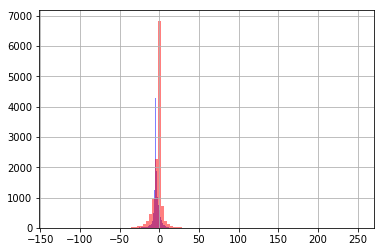

In [96]:
inputs_NGC6341 = load_data_glob('./data/CFIS_PSf_Gaia_NGC6341.fits')
inputs_NGC6205 = load_data_glob('./data/CFIS_PSf_Gaia_NGC6205.fits')
inputs_NGC5466 = load_data_glob('./data/CFIS_PSf_Gaia_NGC5466.fits')
inputs_NGC5272 = load_data_glob('./data/CFIS_PSf_Gaia_NGC5272.fits')

inputs_NGC6341['pmra'].std()

inputs_NGC6341['pmra'].hist(alpha=0.5, color='blue', bins=100)
inputs_NGC6341['pmdec'].hist(alpha=0.5, color='red', bins=100)

# load json and create model
from keras.models import model_from_json

json_file = open('./models/1st_col/model_num_1st_col.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./models/1st_col/model_num_1st_col.h5")

##############################
## NGC 6341 ##
##############################
criteria = criteria_function(inputs_NGC6341, std_x, 2.5, 0)
inputs_NGC6341 = inputs_NGC6341[criteria]
inputs_NGC6341_b = change_to_colour(inputs_NGC6341)
inputs_NGC6341['class'] =  loaded_model.predict_classes(inputs_NGC6341_b.values)
    
##############################
## NGC 6205 ##
##############################
criteria = criteria_function(inputs_NGC6205, std_x, 2.5, 0)
inputs_NGC6205 = inputs_NGC6205[criteria]
inputs_NGC6205_b = change_to_colour(inputs_NGC6205)
inputs_NGC6205['class'] =  loaded_model.predict_classes(inputs_NGC6205_b.values)

##############################
## NGC 5466 ##
##############################
criteria = criteria_function(inputs_NGC5466, std_x, 2.5, 0)
inputs_NGC5466 = inputs_NGC5466[criteria]
inputs_NGC5466_b = change_to_colour(inputs_NGC5466)
inputs_NGC5466['class'] =  loaded_model.predict_classes(inputs_NGC5466_b.values)

##############################
## NGC 5272 ##
##############################
criteria = criteria_function(inputs_NGC5272, std_x, 2.5, 0)
inputs_NGC5272 = inputs_NGC5272[criteria]
inputs_NGC5272_b = change_to_colour(inputs_NGC5272)
inputs_NGC5272['class'] =  loaded_model.predict_classes(inputs_NGC5272_b.values)

In [97]:
inputs_NGC6341_giants = inputs_NGC6341[(inputs_NGC6341['class']==1)]
inputs_NGC6341_dwarfs = inputs_NGC6341[(inputs_NGC6341['class']==0)]

inputs_NGC6205_giants = inputs_NGC6205[(inputs_NGC6205['class']==1)]
inputs_NGC6205_dwarfs = inputs_NGC6205[(inputs_NGC6205['class']==0)]

inputs_NGC5466_giants = inputs_NGC5466[(inputs_NGC5466['class']==1)]
inputs_NGC5466_dwarfs = inputs_NGC5466[(inputs_NGC5466['class']==0)]

inputs_NGC5272_giants = inputs_NGC5272[(inputs_NGC5272['class']==1)]
inputs_NGC5272_dwarfs = inputs_NGC5272[(inputs_NGC5272['class']==0)]

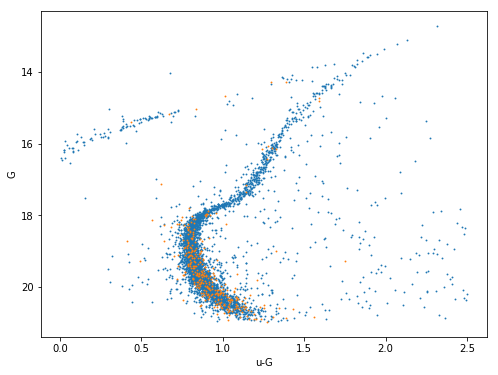

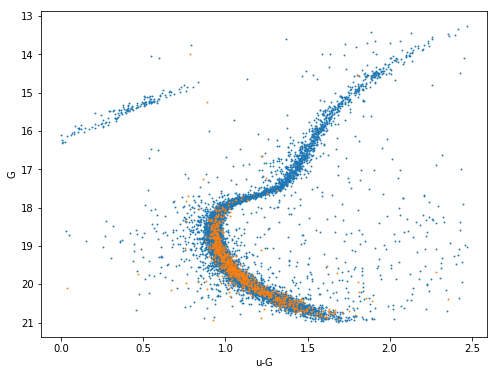

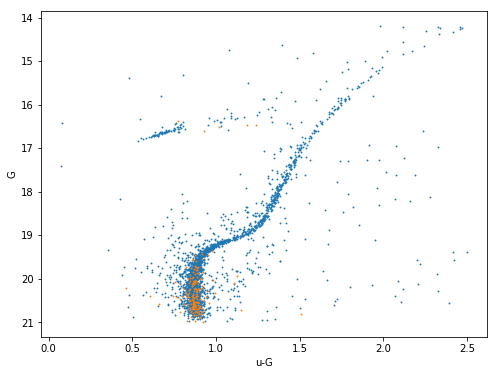

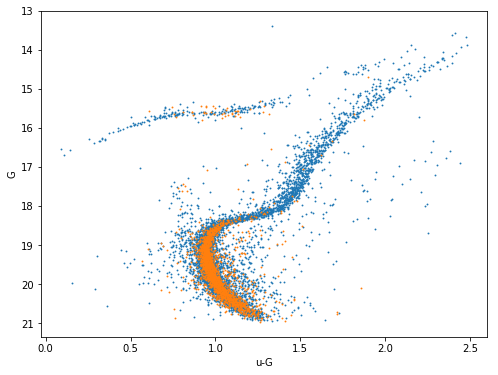

In [100]:
fig =plt.figure(figsize=(8,6))
plt.xlabel('u-G')
plt.ylabel('G')
plt.scatter((inputs_NGC6341_dwarfs['u']-inputs_NGC6341_dwarfs['G']).values, inputs_NGC6341_dwarfs['G'].values, s=0.75)
plt.scatter((inputs_NGC6341_giants['u']-inputs_NGC6341_giants['G']).values, inputs_NGC6341_giants['G'].values, s=0.75)#, rasterized=True, c=inputs_NGC5272['class'], cmap=plt.cm.RdBu)
plt.gca().invert_yaxis()
plt.savefig('./plots/1st_col/NGC6341_1st_col')

fig =plt.figure(figsize=(8,6))
plt.xlabel('u-G')
plt.ylabel('G')
plt.scatter((inputs_NGC6205_dwarfs['u']-inputs_NGC6205_dwarfs['G']).values, inputs_NGC6205_dwarfs['G'].values, s=0.75)
plt.scatter((inputs_NGC6205_giants['u']-inputs_NGC6205_giants['G']).values, inputs_NGC6205_giants['G'].values, s=0.75)#, rasterized=True, c=inputs_NGC5272['class'], cmap=plt.cm.RdBu)
plt.gca().invert_yaxis()
plt.savefig('./plots/1st_col/NGC6205_1st_col')

fig =plt.figure(figsize=(8,6))
plt.xlabel('u-G')
plt.ylabel('G')
plt.scatter((inputs_NGC5466_dwarfs['u']-inputs_NGC5466_dwarfs['G']).values, inputs_NGC5466_dwarfs['G'].values, s=0.75)
plt.scatter((inputs_NGC5466_giants['u']-inputs_NGC5466_giants['G']).values, inputs_NGC5466_giants['G'].values, s=0.75)#, rasterized=True, c=inputs_NGC5272['class'], cmap=plt.cm.RdBu)
plt.gca().invert_yaxis()
plt.savefig('./plots/1st_col/NGC5466_1st_col')


fig =plt.figure(figsize=(8,6))
plt.xlabel('u-G')
plt.ylabel('G')
plt.scatter((inputs_NGC5272_dwarfs['u']-inputs_NGC5272_dwarfs['G']).values, inputs_NGC5272_dwarfs['G'].values, s=0.75)
plt.scatter((inputs_NGC5272_giants['u']-inputs_NGC5272_giants['G']).values, inputs_NGC5272_giants['G'].values, s=0.75)#, rasterized=True, c=inputs_NGC5272['class'], cmap=plt.cm.RdBu)
plt.gca().invert_yaxis()
plt.savefig('./plots/1st_col/NGC5272_1st_col')

In [ ]:
inputs_draco = load_data_glob('./data/CFIS_PSf_Gaia_Draco.fits')

In [ ]:
print inputs_draco.shape